### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

### load data

In [2]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### EDA

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
data.duplicated().sum()

np.int64(0)

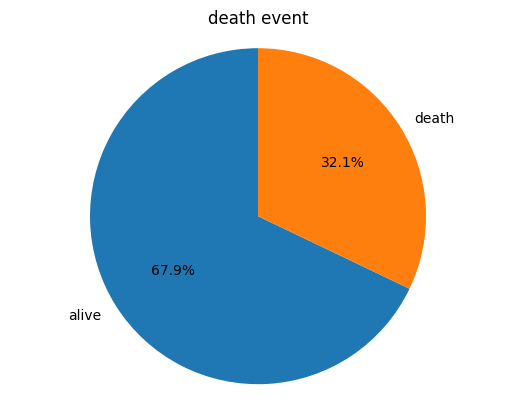

In [10]:
count = data['DEATH_EVENT'].value_counts()
plt.pie(count , labels=['alive', 'death'],autopct='%1.1f%%', startangle=90)
plt.title('death event')
plt.axis('equal')
plt.show()

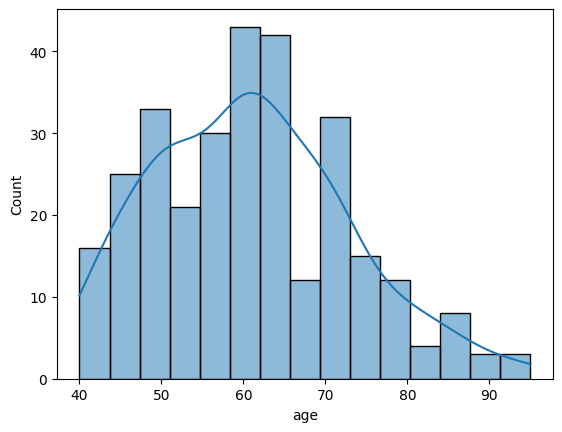

In [11]:
sns.histplot(data['age'], kde= True , bins = 15)
plt.show()

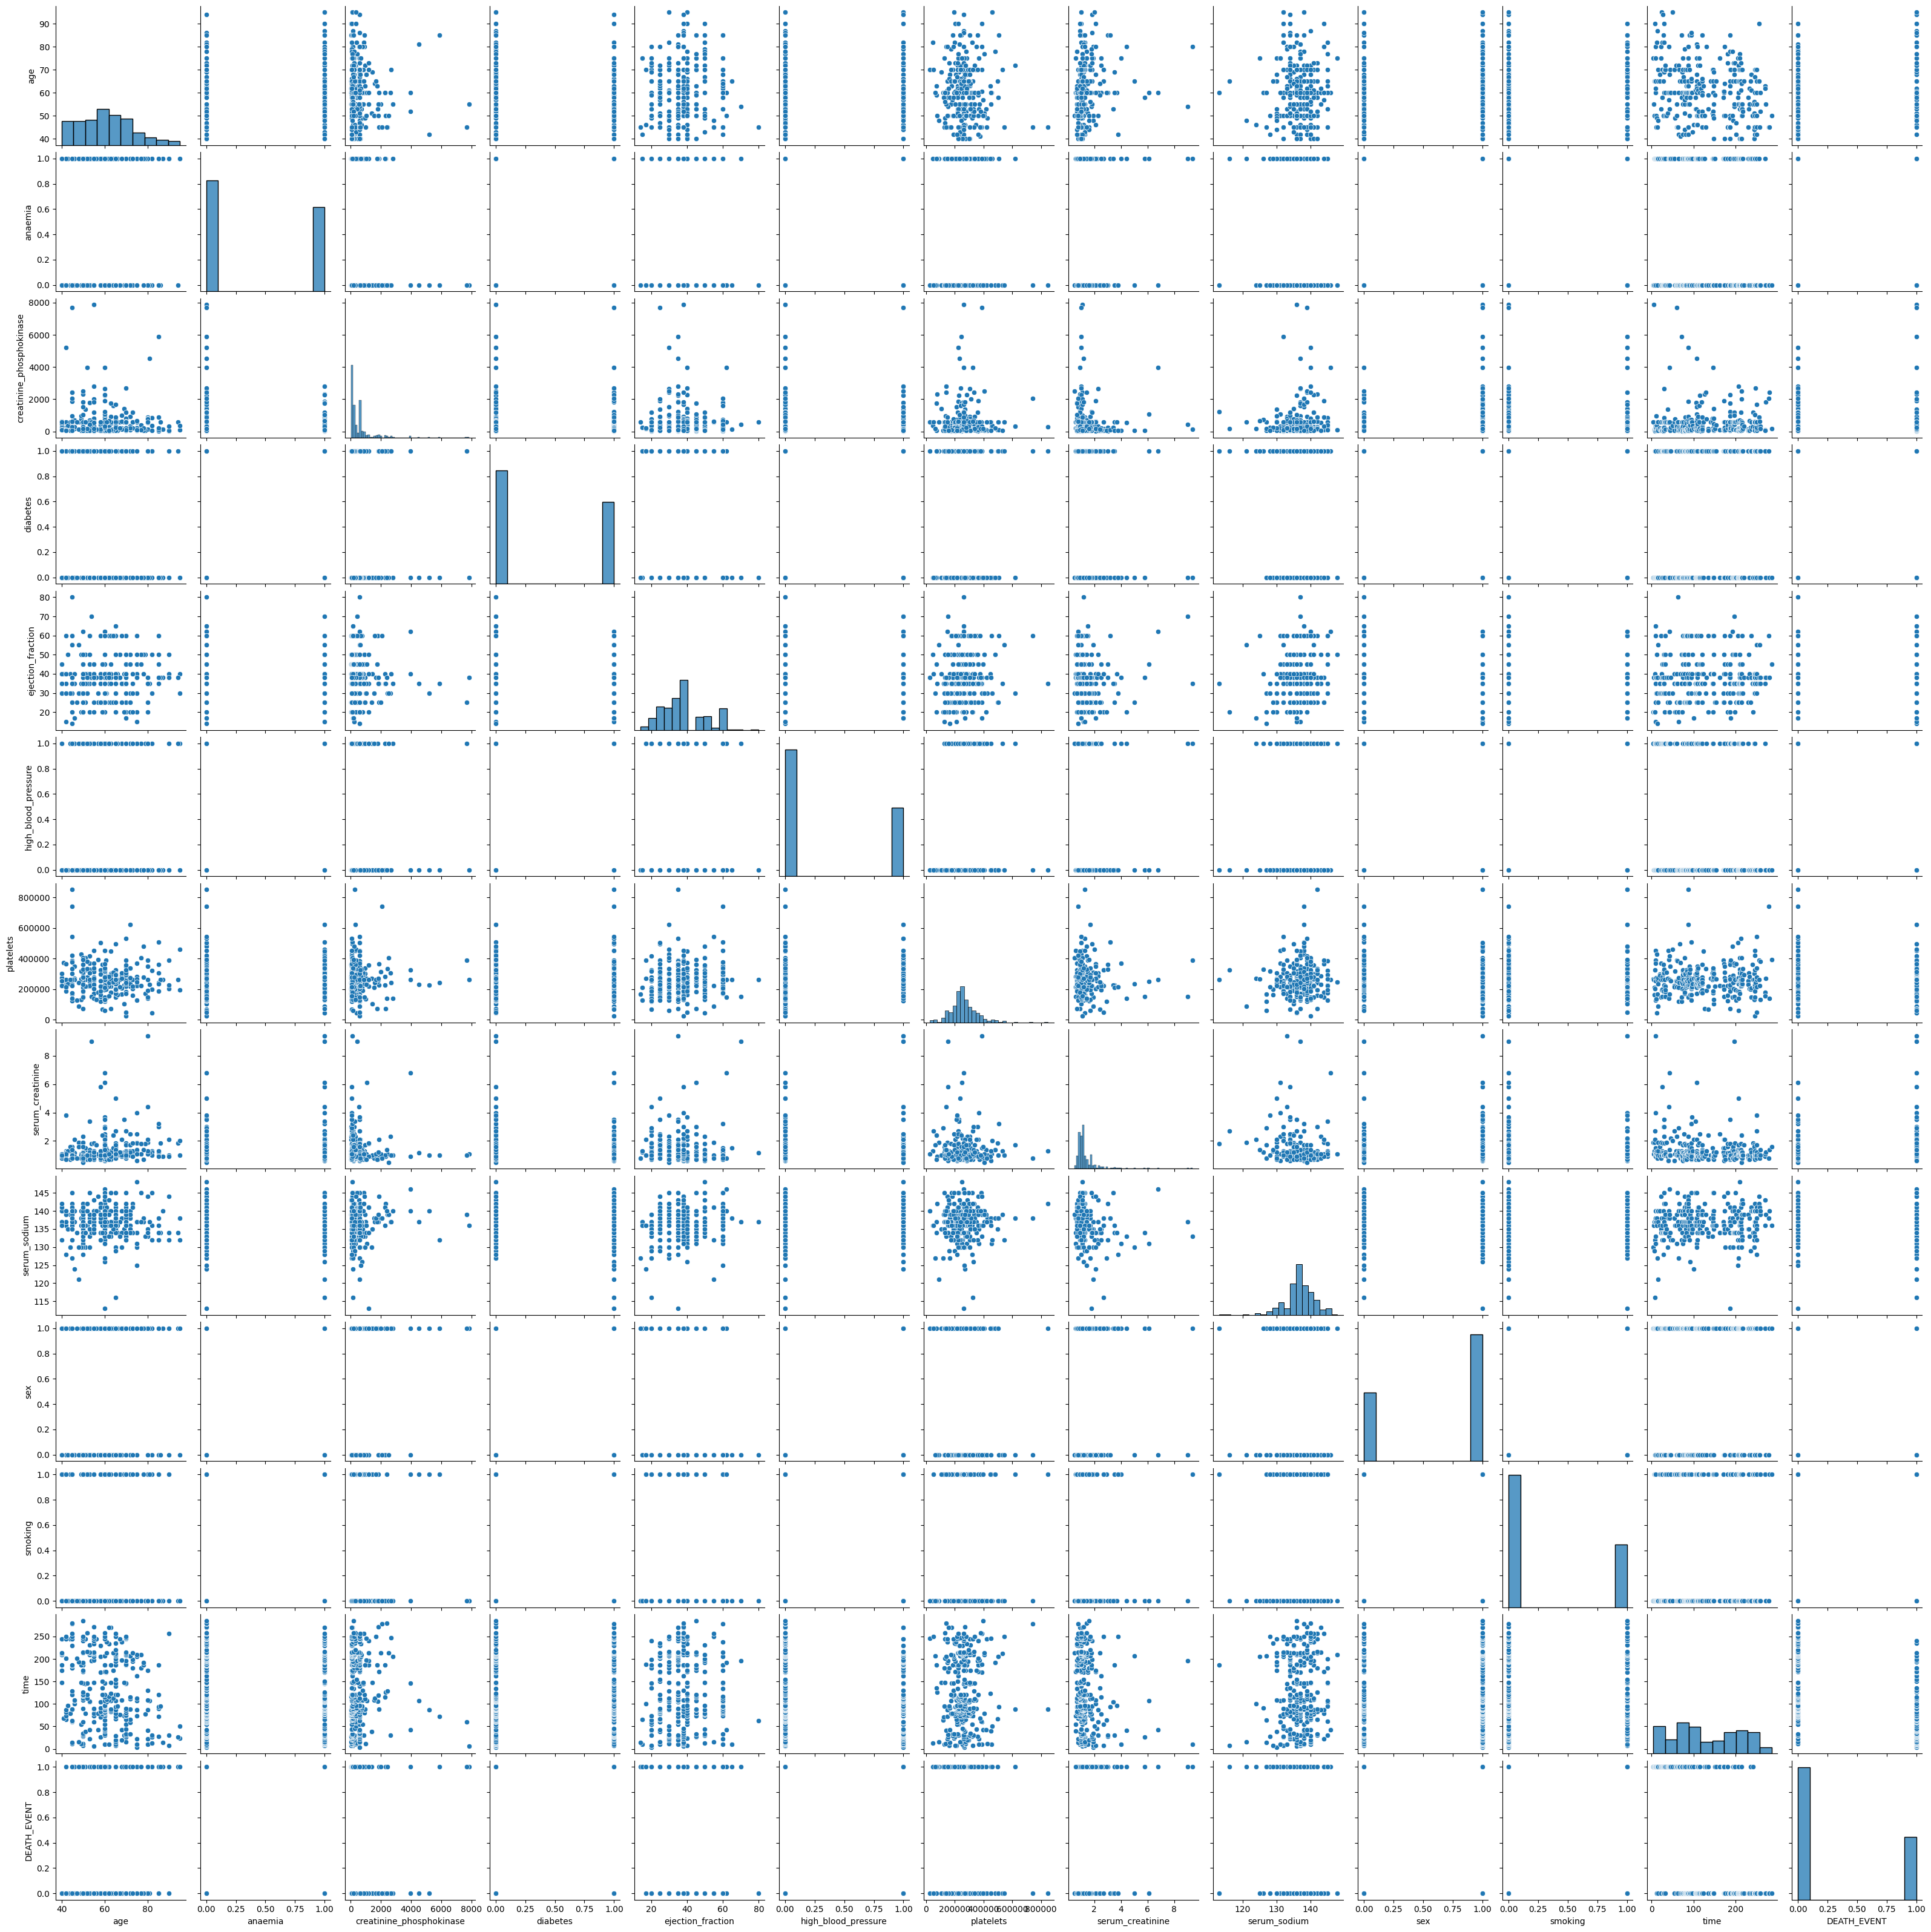

In [12]:
sns.pairplot(data)

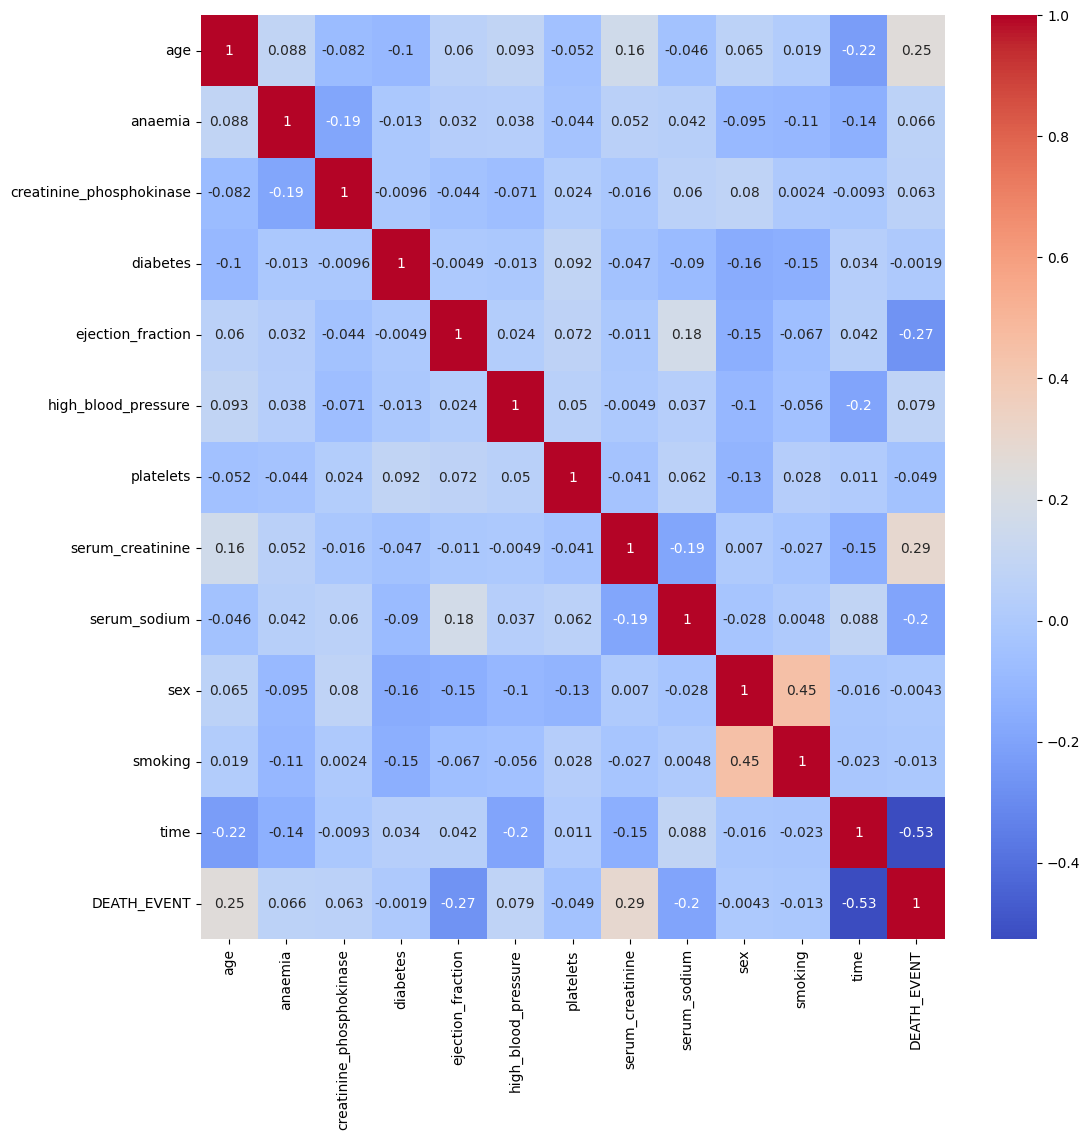

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),cmap = 'coolwarm',annot = True)
plt.show()

### preprocessing


In [14]:
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [15]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [18]:
y_train.value_counts()

DEATH_EVENT
0    162
1     77
Name: count, dtype: int64

In [19]:
y_train_resampled.value_counts()

DEATH_EVENT
0    162
1    162
Name: count, dtype: int64

### PCA

In [20]:
pca = PCA(n_components=3)  
x_pca = pca.fit_transform(X_train_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA shape:", x_pca.shape)


Explained variance ratio: [0.1313682  0.12918277 0.10476669]
PCA shape: (324, 3)


In [21]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_train_scaled)

print("Selected components:", pca.n_components_)


Selected components: 11


### Build Modeling 

### Random Forest

In [22]:
rf=RandomForestClassifier(random_state=42)
params ={
    'n_estimators':[30,50,100],
    'max_depth':[2,4],
    'min_samples_split':[3,4],
    'min_samples_leaf':[2,3],
    'bootstrap':[True],
    'class_weight':['balanced']
    
}

In [23]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [2, 4], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [30, 50, 100]})

In [24]:
best_params=grid_search.best_params_
best_params

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 50}

In [25]:
best_rf=grid_search.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=50, random_state=42)

In [26]:
y_pred=best_rf.predict(X_test_scaled)

In [27]:
print(y_test.tail(10))
print(y_pred[-10:])

117    0
193    0
246    1
122    0
242    0
210    0
172    0
26     1
221    0
145    0
Name: DEATH_EVENT, dtype: int64
[1 0 0 0 0 0 0 1 0 0]


In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report',classification_report(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))
print('confusion_matrix',confusion_matrix(y_test, y_pred))

classification_report               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60

accuracy_score 0.8666666666666667
confusion_matrix [[38  3]
 [ 5 14]]


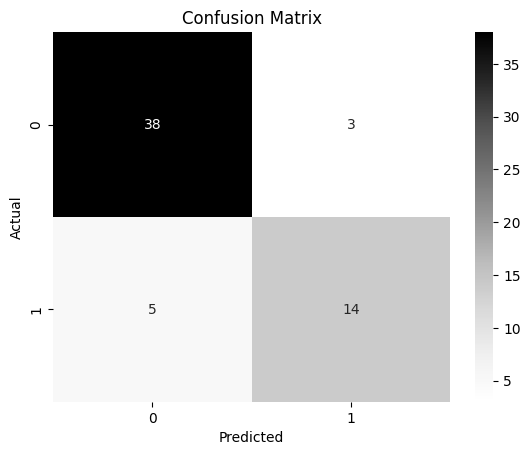

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greys')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### SVM


In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight' :['balanced']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='balanced_accuracy')
grid.fit(X_train_scaled, y_train_resampled)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Params: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy: 0.8607007575757576


### Xgboost


In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [32]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb_clf, params, scoring='accuracy', cv=10, n_jobs= -1 , verbose= 1)
grid.fit(X_train_scaled, y_train_resampled)

best_xgb = grid.best_estimator_
print("best_parameter", grid.best_params_)

y_pred_best = best_xgb.predict(X_test_scaled)
print("XGBoost :", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


c:\Users\Ramo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


best_parameter {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
XGBoost : 0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



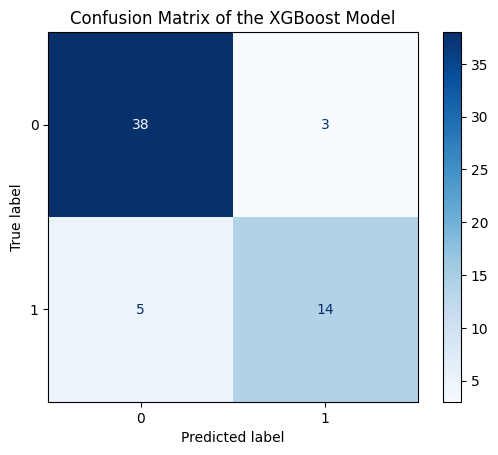

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of the XGBoost Model")
plt.show()